In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras.backend as K

In [2]:
#Prediction of Moisture 3 using Moisture 0, 1 and 2
input_columns = ['year', 'month', 'day', 'hour', 'minute', 'moisture0', 'moisture1', 'moisture2']
prediction = ['moisture3']

In [3]:
#splitting the dataset as training and testing sets
train_size = 4000
test_size = 1000

In [4]:
#Defining the function for returning the sum of absolute values
def sum_error(y_true, y_pred):
        return K.sum(K.abs(y_pred - y_true))

In [5]:
#Evaluation Function calling
K.eval(K.sum(K.abs(np.array([0,3]) - np.array([2,5]))))

4

In [6]:
#Reading the Dataset
data_frame = pd.read_csv('soil_moisture_dataset.csv')

In [7]:
data_frame

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4,condition
0,2020,3,6,22,16,11,0.70,0.64,0.73,0.40,0.02,False
1,2020,3,6,22,17,11,0.70,0.64,0.71,0.39,0.02,False
2,2020,3,6,22,18,11,0.69,0.63,0.70,0.39,0.02,False
3,2020,3,6,22,19,11,0.69,0.63,0.70,0.39,0.02,False
4,2020,3,6,22,20,12,0.69,0.62,0.69,0.39,0.02,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4112,2020,3,9,19,12,49,0.18,0.62,0.60,0.10,0.03,False
4113,2020,3,9,19,13,49,0.18,0.62,0.59,0.10,0.02,False
4114,2020,3,9,19,14,49,0.18,0.62,0.59,0.10,0.02,False
4115,2020,3,9,19,15,49,0.18,0.62,0.60,0.10,0.02,False


In [8]:
data_frame = data_frame.sample(frac=1)

In [9]:
#Dropping a Column, i.e. 'Condition'
data_frame.drop(columns=['condition'])

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4
1959,2020,3,8,7,18,1,0.51,0.68,0.71,0.29,0.02
3196,2020,3,9,3,56,4,0.26,0.62,0.64,0.10,0.02
1716,2020,3,8,3,14,48,0.52,0.68,0.70,0.40,0.02
2593,2020,3,8,17,52,33,0.40,0.65,0.69,0.14,0.02
222,2020,3,7,1,58,22,0.57,0.67,0.71,0.53,0.02
...,...,...,...,...,...,...,...,...,...,...,...
428,2020,3,7,5,24,33,0.61,0.65,0.74,0.58,0.02
3629,2020,3,9,11,9,25,0.22,0.62,0.60,0.09,0.02
3640,2020,3,9,11,20,26,0.23,0.62,0.60,0.10,0.03
1615,2020,3,8,1,33,43,0.52,0.68,0.70,0.45,0.02


<AxesSubplot:>

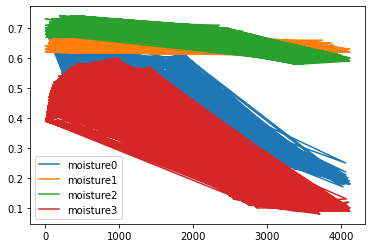

In [10]:
#Plotting the AxesSubplot of moisture 0, 1, 2 and 3
data_frame[['moisture0', 'moisture1','moisture2', 'moisture3']].plot()

In [11]:
#Assigning the values for Training and Testing Purpose
X_train = data_frame[input_columns][:train_size]
Y_train = data_frame[prediction][:train_size]
X_test = data_frame[input_columns][train_size:]
Y_test = data_frame[prediction][train_size:]

In [12]:
#Displaying the number of rows and columns of the DataFrame
X_train.shape, Y_train.shape

((4000, 8), (4000, 1))

In [13]:
#Using sequential model to display output shape and parameters
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=len(input_columns), input_shape=(len(input_columns),), activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=len(prediction), input_shape=(len(input_columns),)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Compiling the model to finalise the model and making it completely ready to use
model.compile(optimizer='adam', loss=sum_error, metrics=['MSE'])

In [15]:
#Fitting training data to measure how the model generalizes to similar data
model.fit(X_train,Y_train, epochs=10)

Epoch 1/10
125/125 [==============================] - 1s 2ms/step - loss: 10145.2559 - MSE: 156162.3438
Epoch 2/10
125/125 [==============================] - 0s 2ms/step - loss: 2708.0283 - MSE: 18574.1641
Epoch 3/10
125/125 [==============================] - 0s 2ms/step - loss: 2287.2607 - MSE: 13790.9531
Epoch 4/10
125/125 [==============================] - 0s 2ms/step - loss: 1821.7413 - MSE: 8667.1016
Epoch 5/10
125/125 [==============================] - 0s 2ms/step - loss: 1306.6351 - MSE: 4789.8345
Epoch 6/10
125/125 [==============================] - 0s 2ms/step - loss: 909.9183 - MSE: 2439.6060
Epoch 7/10
125/125 [==============================] - 0s 2ms/step - loss: 521.6840 - MSE: 921.9382
Epoch 8/10
125/125 [==============================] - 0s 2ms/step - loss: 194.0406 - MSE: 153.3336
Epoch 9/10
125/125 [==============================] - 0s 2ms/step - loss: 23.3625 - MSE: 2.2241
Epoch 10/10
125/125 [==============================] - 0s 2ms/step - loss: 6.4957 - MSE: 0.0624


In [16]:
#Evaluating to check whether the model is best fit for the given problem and corresponding data
model.evaluate(X_test, Y_test)

4/4 [==============================] - 1s 0s/step - loss: 9.1039 - MSE: 0.1250


[9.103867530822754, 0.12499889731407166]

In [17]:
#Setting weights in Keras using numpy array
weights = np.array(model.get_weights())

C:\Users\Guna\AppData\Local\Temp\ipykernel_7812\2561428532.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  weights = np.array(model.get_weights())


In [18]:
#Using get_weights() to return the weights of the model as a list of Numpy arrays
model.get_weights()

[array([[-0.02455837,  0.00254142, -0.00680663, -0.00171153,  0.12400887,
         -0.14202097,  0.4804928 ,  0.00136797],
        [-0.2745738 , -0.8738133 , -0.49014652,  0.39026225, -0.15598845,
         -0.33252218, -0.3252003 , -0.68160963],
        [-0.21748248, -0.36079445,  0.13645664, -0.5105478 , -0.30297658,
          0.26874632, -0.49501085, -0.05999696],
        [ 0.49887174, -0.03569761, -0.04930281, -0.03742797,  0.04246158,
         -0.11583367,  0.47375572, -0.60494334],
        [-0.08943027,  0.02500141, -0.2841491 ,  0.07310503, -0.70249945,
         -0.21106806, -0.17439951, -0.20551796],
        [ 0.41083246, -0.18108693,  0.47280148,  0.47051463, -0.34108904,
         -0.46098375, -0.33646497,  0.1647648 ],
        [-0.10569757, -0.29907683,  0.421156  , -0.02892565, -0.2545911 ,
         -0.14125389, -0.26425916, -0.6512484 ],
        [-0.09642369,  0.16883966, -0.35313424,  0.18310137,  0.20846002,
         -0.06475085,  0.4671071 ,  0.05616273]], dtype=float32),

In [19]:
#convert dataframe into numpy array
Y_test.to_numpy()[58]

array([0.31])

In [20]:
#Using predict() method for the actual prediction (to generate output predictions for the input samples)
prediction = model.predict(X_test.to_numpy())

4/4 [==============================] - 0s 3ms/step


In [21]:
#Displaying the accuracy value of moisture 3
count = 0
for i in range(len(X_test)):
    if np.abs(prediction[i][0] - Y_test.to_numpy()[i]) > 0.1:
        count += 1
print(count/len(X_test))

0.811965811965812


In [22]:
#Prediction of Moisture 4 using Moisture 0, 1 and 2
input_columns = ['year', 'month', 'day', 'hour', 'minute', 'moisture0', 'moisture1', 'moisture2']
prediction = ['moisture4']

In [23]:
#splitting the dataset as training and testing sets
train_size = 4000
test_size = 1000

In [24]:
#Defining the function for returning the sum of absolute values
def sum_error(y_true, y_pred):
        return K.sum(K.abs(y_pred - y_true))

In [25]:
#Evaluation Function calling
K.eval(K.sum(K.abs(np.array([0,3]) - np.array([2,5]))))

4

In [26]:
#Reading the Dataset
data_frame = pd.read_csv('soil_moisture_dataset.csv')
data_frame

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4,condition
0,2020,3,6,22,16,11,0.70,0.64,0.73,0.40,0.02,False
1,2020,3,6,22,17,11,0.70,0.64,0.71,0.39,0.02,False
2,2020,3,6,22,18,11,0.69,0.63,0.70,0.39,0.02,False
3,2020,3,6,22,19,11,0.69,0.63,0.70,0.39,0.02,False
4,2020,3,6,22,20,12,0.69,0.62,0.69,0.39,0.02,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4112,2020,3,9,19,12,49,0.18,0.62,0.60,0.10,0.03,False
4113,2020,3,9,19,13,49,0.18,0.62,0.59,0.10,0.02,False
4114,2020,3,9,19,14,49,0.18,0.62,0.59,0.10,0.02,False
4115,2020,3,9,19,15,49,0.18,0.62,0.60,0.10,0.02,False


In [27]:
data_frame = data_frame.sample(frac=1)

In [28]:
#Dropping a Column, i.e. 'Condition'
data_frame.drop(columns=['condition'])

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4
2177,2020,3,8,10,56,12,0.47,0.68,0.69,0.33,0.02
452,2020,3,7,5,48,34,0.59,0.65,0.74,0.58,0.02
2244,2020,3,8,12,3,15,0.45,0.67,0.70,0.32,0.02
2874,2020,3,8,22,33,47,0.37,0.65,0.66,0.12,0.03
2121,2020,3,8,10,0,9,0.48,0.68,0.70,0.31,0.02
...,...,...,...,...,...,...,...,...,...,...,...
3985,2020,3,9,17,5,43,0.19,0.63,0.61,0.10,0.02
3256,2020,3,9,4,56,7,0.26,0.61,0.64,0.10,0.02
3342,2020,3,9,6,22,11,0.25,0.61,0.59,0.10,0.02
3955,2020,3,9,16,35,41,0.19,0.63,0.61,0.09,0.02


<AxesSubplot:>

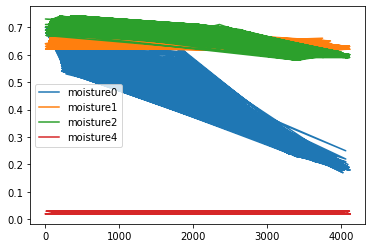

In [29]:
#Plotting the AxesSubplot of moisture 0, 1, 2 and 4
data_frame[['moisture0', 'moisture1','moisture2', 'moisture4']].plot()

In [30]:
#Assigning the values for Training and Testing Purpose
X_train = data_frame[input_columns][:train_size]
Y_train = data_frame[prediction][:train_size]
X_test = data_frame[input_columns][train_size:]
Y_test = data_frame[prediction][train_size:]

In [31]:
#Displaying the number of rows and columns of the DataFrame
X_train.shape, Y_train.shape

((4000, 8), (4000, 1))

In [32]:
#Using sequential model to display output shape and parameters
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=len(input_columns), input_shape=(len(input_columns),), activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=len(prediction), input_shape=(len(input_columns),)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [33]:
#Compiling the model to finalise the model and making it completely ready to use
model.compile(optimizer='adam', loss=sum_error, metrics=['MSE'])

In [34]:
#Fitting training data to measure how the model generalizes to similar data
model.fit(X_train,Y_train, epochs=10)

Epoch 1/10
125/125 [==============================] - 1s 2ms/step - loss: 11993.6836 - MSE: 228364.3750
Epoch 2/10
125/125 [==============================] - 0s 2ms/step - loss: 5066.1812 - MSE: 85411.1406
Epoch 3/10
125/125 [==============================] - 0s 3ms/step - loss: 4667.1665 - MSE: 74397.0469
Epoch 4/10
125/125 [==============================] - 0s 2ms/step - loss: 4161.5552 - MSE: 59096.8594
Epoch 5/10
125/125 [==============================] - 0s 2ms/step - loss: 3728.5906 - MSE: 47990.3594
Epoch 6/10
125/125 [==============================] - 0s 2ms/step - loss: 3263.8425 - MSE: 36728.7578
Epoch 7/10
125/125 [==============================] - 0s 2ms/step - loss: 2846.9382 - MSE: 28816.2520
Epoch 8/10
125/125 [==============================] - 0s 2ms/step - loss: 2397.8726 - MSE: 21322.8770
Epoch 9/10
125/125 [==============================] - 0s 2ms/step - loss: 2241.5178 - MSE: 18073.6660
Epoch 10/10
125/125 [==============================] - 0s 3ms/step - loss: 1940.

In [35]:
#Evaluating to check whether the model is best fit for the given problem and corresponding data
model.evaluate(X_test, Y_test)

4/4 [==============================] - 1s 3ms/step - loss: 6.5576 - MSE: 0.0679


[6.557563304901123, 0.06790944188833237]

In [36]:
#Setting weights in Keras using numpy array
weights = np.array(model.get_weights())

C:\Users\Guna\AppData\Local\Temp\ipykernel_7812\2561428532.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  weights = np.array(model.get_weights())


In [37]:
#Using get_weights() to return the weights of the model as a list of Numpy arrays
model.get_weights()

[array([[-0.44475663,  0.4118056 , -0.54914176,  0.30630043, -0.5190857 ,
          0.3159603 , -0.5682067 ,  0.05683583],
        [-0.41979307,  0.19676977, -0.13772738, -0.51102936, -0.51831746,
          0.34958884,  0.07711905,  0.31066805],
        [-0.3688925 , -0.52029806,  0.29960406, -0.49573228, -0.1933428 ,
         -0.5220304 ,  0.17347574, -0.37859136],
        [-0.22952068, -0.7017748 ,  0.5644246 , -0.14952411, -0.01273948,
         -0.1453413 , -0.3294071 , -0.18296611],
        [-0.1958006 , -0.48554122, -0.12769696,  0.35902366, -0.37627077,
          0.03949838,  0.572617  , -0.41785625],
        [ 0.22207302, -0.58862257,  0.37789637, -0.35782912,  0.51306444,
         -0.32791975, -0.48510033, -0.51057494],
        [ 0.20372802,  0.30065417,  0.499435  , -0.7040867 ,  0.48378474,
         -0.64223605, -0.04603046,  0.20831794],
        [-0.4466669 , -0.17033657,  0.57821506, -0.04323533, -0.29421955,
         -0.12185659,  0.0477559 ,  0.03084094]], dtype=float32),

In [38]:
#convert dataframe into numpy array
Y_test.to_numpy()[58]

array([0.02])

In [39]:
#Using predict() method for the actual prediction (to generate output predictions for the input samples)
prediction = model.predict(X_test.to_numpy())

4/4 [==============================] - 0s 3ms/step


In [40]:
#Displaying the accuracy value of moisture 4
count = 0
for i in range(len(X_test)):
    if np.abs(prediction[i][0] - Y_test.to_numpy()[i]) > 0.1:
        count += 1
print(count/len(X_test))

0.7606837606837606
